### Loading important libraries and data

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

##### Root Directory

In [26]:
root_directory = 'F:/open_git/bee_eyes'

##### Load data

In [27]:
eyes = pd.read_csv(f'{root_directory}/data/eyes_df.txt', delimiter='\t')

## Principal component analysis

#### Selecting numerical columns for PCA (adjust as necessary)

In [28]:
features = ['nf', 'vf', 'ff', 'df', 'co', 'ea', 'nfa', 'di']  
x = eyes.loc[:, features].values
y = eyes.loc[:, ['FamHab']].values

#### Standardizing the data

In [29]:
x = StandardScaler().fit_transform(x)

#### Applying PCA (2 components)

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

#### Creating a DataFrame with the principal components

In [31]:
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

#### Concatenating principal components with 'FamHab' (categorical variable)

In [32]:
finalDf = pd.concat([principalDf, eyes[['FamHab']]], axis=1)

#### Loadings (eigenvectors) for biplot

In [33]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

## Plotting PCA biplot

#### Verifying if the data is correct before plotting

In [35]:
print(finalDf.head())

   Principal Component 1  Principal Component 2  FamHab
0              -1.457938              -0.446421  HalCre
1              -1.506005              -0.458188  HalCre
2              -1.775502              -0.513719  HalCre
3              -0.866524              -0.695283  HalCre
4              -0.973079              -0.460232  HalCre


#### Creating a biplot

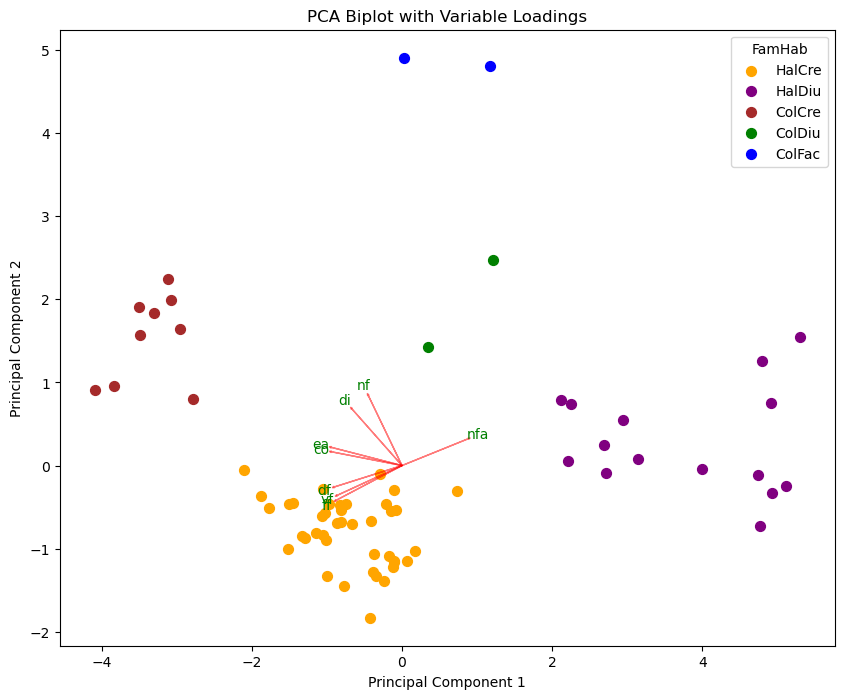

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors for each category in 'FamHab'
targets = finalDf['FamHab'].unique()
colors = ['orange', 'purple', 'brown', 'green', 'blue']

# Scatter plot for each category in 'FamHab'
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['FamHab'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1'],
               finalDf.loc[indicesToKeep, 'Principal Component 2'],
               c=color, s=50, label=target)

# Adding arrows for each loading (original variable's influence on principal components)
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.02)
    ax.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='g', ha='center', va='center')

# Adding labels, title, and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Biplot with Variable Loadings')
ax.legend(title='FamHab')

# Save and show the plot
plt.savefig(f'{root_directory}/results/eyes_pca.png')
plt.show()